In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
from statsmodels.distributions.empirical_distribution import ECDF

import math

from statsmodels.stats.descriptivestats import sign_test as sign_test

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

<h1>Часть 1</h1>

In [258]:
df_D = pd.read_excel('data_matstat.xls', sheet_name='D - homedat')
df_D.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13
0,2050,2243,2289,2650,13,7,north,Y,6.421,4.9671,2,Y,1639
1,2080,2255,2355,2600,8,4,north,Y,7.185,4.9671,2,Y,1088
2,2150,2307,2443,2664,6,5,north,Y,6.998,6.0622,3,Y,1193
3,2150,2232,2351,2921,3,6,north,Y,7.147,6.0622,3,Y,1635
4,1999,2054,2113,2580,4,4,north,Y,6.430,6.0622,3,Y,1732


In [259]:
#1.1
df_task1_1 = df_D[["D2", "D3", "D4"]]
df_task1_1

,D2,D3,D4
0,2243,2289,2650
1,2255,2355,2600
2,2307,2443,2664
3,2232,2351,2921
4,2054,2113,2580
...,...,...,...
112,1067,1119,1229
113,987,1087,1273
114,1054,1137,1165
115,829,1052,1200


In [260]:
df_task1_1.describe()

,D2,D3,D4
count,117.000000,117.000000,117.000000
mean,1166.461538,1260.444444,1653.854701
std,383.265024,388.552274,523.722802
min,594.000000,690.000000,837.000000
25%,904.000000,1002.000000,1280.000000
50%,1067.000000,1139.000000,1549.000000
75%,1286.000000,1404.000000,1894.000000
max,2307.000000,2443.000000,3750.000000


In [261]:
def sample_characteristic(df):
    mu3 = 0
    mu4 = 0
    count = int(df.shape[0])
    mean = df.mean()
    std = df.std(ddof = 0)

    for i in range(count):
        mu3 += ((df[i] - mean)**3)
        mu4 += ((df[i] - mean)**4)
    mu3 /= count
    mu4 /= count

    coef_asym = mu3 / (std**3)
    excess = (mu4 / (std**4)) - 3
    
    print("\tstd: %.3f" %std)
    print("\tvar: %.3f" %(std**2))
    print("\tasymmetry: %.3f" %coef_asym)
    print("\texcess: %.3f" %excess)
    

In [262]:
print("D2:")
sample_characteristic(df_task1_1["D2"])

print("D3:")
sample_characteristic(df_task1_1["D3"])

print("D4:")
sample_characteristic(df_task1_1["D4"])

D2:
	std: 381.624
	var: 145636.590
	asymmetry: 1.381
	excess: 1.451
D3:
	std: 386.888
	var: 149682.503
	asymmetry: 1.366
	excess: 1.450
D4:
	std: 521.480
	var: 271941.252
	asymmetry: 1.172
	excess: 1.514


In [263]:
#1.2
d4 = df_D[["D4"]].to_numpy()
sample_task1_2 = np.asarray([x[0] for x in d4])
n = sample_task1_2.shape[0]

k = math.floor(1 + math.log(n, 2))
interval_width = (sample_task1_2.max() - sample_task1_2.min()) / k

print("k =", k, " interval width:", interval_width)

k = 7  interval width: 416.14285714285717


In [264]:
def plot_hist(sample, bin_centers, frequency, weights, cumulative, str):
    plt.hist(x = sample, bins = k, edgecolor = 'black', zorder = 0, cumulative = cumulative, weights = weights)
    plt.plot(bin_centers, frequency, color = "red")
    for i in range(k):
        plt.scatter(bin_centers[i], frequency[i], color = "red", edgecolors = "black", zorder = 1)
    plt.xticks(bin_centers)
    plt.xlabel("значения")
    plt.ylabel(str)
    plt.show()

     intervals  freq       rel   acum  rel_acum
0   837 - 1253  26.0  0.222222   26.0  0.222222
1  1253 - 1669  42.0  0.358974   68.0  0.581197
2  1669 - 2085  27.0  0.230769   95.0  0.811966
3  2085 - 2501  10.0  0.085470  105.0  0.897436
4  2501 - 2917   9.0  0.076923  114.0  0.974359
5  2917 - 3333   2.0  0.017094  116.0  0.991453
6  3333 - 3750   1.0  0.008547  117.0  1.000000


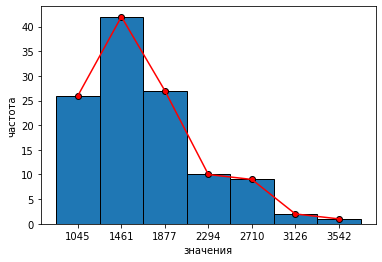

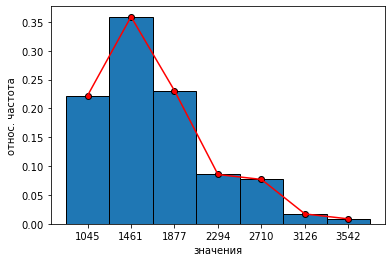

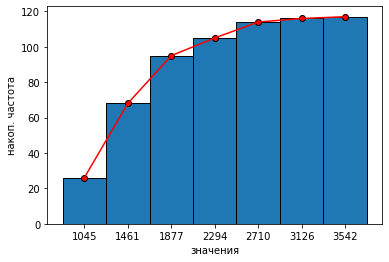

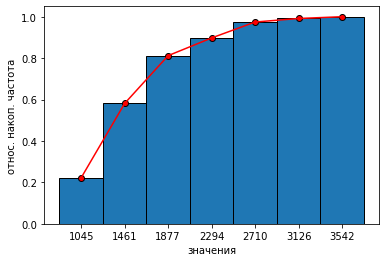

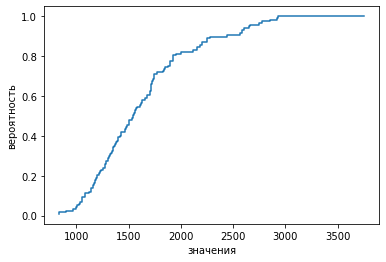

In [265]:
#гистограмма и полигон частот
frequency, interval_borders, _ = plt.hist(x = sample_task1_2, bins = k, edgecolor = 'black', zorder = 0)

bin_centers = [(interval_borders[i] + interval_borders[i + 1]) / 2 for i in range(k)]
plt.xticks(bin_centers)
plt.xlabel("значения")
plt.ylabel("частота")

intervals = []
for i in range(k):
    intervals.append(str(int(interval_borders[i])) + " - " + str(int(interval_borders[i + 1])))

relative_frequency = [x / n for x in frequency]
accumulated_frequency = [sum(frequency[:(i + 1)]) for i in range(7)]
rel_accum_frequency = [x / n for x in accumulated_frequency]

df_task1_2 = pd.DataFrame({"intervals": intervals, "freq": frequency, "rel": relative_frequency, "acum": accumulated_frequency, "rel_acum": rel_accum_frequency})
print(df_task1_2)

plt.plot(bin_centers, frequency, color = "red")
for i in range(k):
    plt.scatter(bin_centers[i], frequency[i], color = "red", edgecolors = "black", zorder = 1)
plt.show()

#гистограмма и полигон относительных частот
plot_hist(sample_task1_2, bin_centers, relative_frequency, (sample_task1_2.shape[0] * [1 / sample_task1_2.shape[0]]), False, "относ. частота")

#гистограмма и полигон накопленных частот
plot_hist(sample_task1_2, bin_centers, accumulated_frequency, None, True, "накоп. частота")

#гистограмма и полигон относительных накопленных частот
plot_hist(sample_task1_2, bin_centers, rel_accum_frequency, (sample_task1_2.shape[0] * [1 / sample_task1_2.shape[0]]), True, "относ. накоп. частота")

#эмпирическая функция распределения
ecdf = ECDF(sample_task1_2.tolist())
plt.step(ecdf.x, ecdf.y)
plt.xlabel("значения")
plt.ylabel("вероятность")
plt.show()

In [266]:
def calc_cl_mean(sample, alpha):
    n = sample.shape[0]
    sample_mean = sample.mean()
    scale = ((sample.var() * n / (n - 1))**(0.5)) / (n**(0.5)) * sps.t(df = (n - 1)).ppf(1 - (alpha / 2))
    return (sample_mean - scale, sample_mean + scale)

In [267]:
def calc_cl_var(sample, alpha):
    n = sample.shape[0]
    s2 = sample.var() * n / (n - 1)
    left = (n - 1) * s2 / sps.chi2(df = n - 1).ppf(1 - (alpha / 2))
    right = (n - 1) * s2 / sps.chi2(df = n - 1).ppf(alpha / 2)
    return (left, right)

In [268]:
def calc_cl_diff_mean(sample1, sample2, alpha):
    n1 = sample1.shape[0]
    n2 = sample2.shape[0]

    mean_diff = sample1.mean() - sample2.mean()
    s2_1 = sample1.var() * n1 / (n1 - 1)
    s2_2 = sample2.var() * n2 / (n2 - 1)

    k = (((s2_1 / n1) + (s2_2 / n2))**2) / ((((s2_1 / n1)**2) / (n1 - 1)) + (((s2_2 / n2)**2) / (n2 - 1)))

    scale = (s2_1 / n1) + (s2_2 / n2) * sps.t(df = k).ppf(1 - alpha / 2)
    return (mean_diff - scale, mean_diff + scale)

In [269]:
def calc_cl_relate_var(sample1, sample2, alpha):
    n1 = sample1.shape[0]
    n2 = sample2.shape[0]
    relation = (sample1.var() * n1 / (n1 - 1)) / (sample2.var() * n2 / (n2 - 1))

    left = relation * sps.f(dfn = (n2 - 1), dfd = (n1 - 1)).ppf(alpha / 2)
    right = relation * sps.f(dfn = (n2 - 1), dfd = (n1 - 1)).ppf(1 - (alpha / 2))
    return (left, right)

<h1>Часть 2</h1>

In [270]:
#2.1
d4 = df_D[["D4"]].to_numpy()
sample_task2_1 = np.asarray([x[0] for x in d4])

print("mean:")
for alpha in [0.01, 0.05, 0.1]:
    print("alpha = %.2f: " %alpha, calc_cl_mean(sample_task2_1, alpha))

mean:
alpha = 0.01:  (1527.053379955637, 1780.656021753765)
alpha = 0.05:  (1557.9563743732806, 1749.7530273361212)
alpha = 0.10:  (1573.572705755248, 1734.1366959541538)


In [271]:
#2.2
d4 = df_D[["D4"]].to_numpy()
sample_task2_2 = np.asarray([x[0] for x in d4])

print("var:")
for alpha in [0.01, 0.05, 0.1]:
    print("alpha = %.2f: " %alpha, calc_cl_var(sample_task2_1, alpha))

var:
alpha = 0.01:  (200136.47886326932, 395135.1200697979)
alpha = 0.05:  (215416.9162745369, 361214.8418452665)
alpha = 0.10:  (223846.47811100548, 345336.2319924246)


In [272]:
#2.3
d1 = df_D[["D1"]].to_numpy()
sample_task2_3_first = np.asarray([x[0] for x in d1])

d2 = df_D[["D2"]].to_numpy()
sample_task2_3_second = np.asarray([x[0] for x in d2])

print("mean1: %.3f" %sample_task2_3_first.mean())
print("mean2: %.3f" %sample_task2_3_second.mean())
print("\n")

print("mean diff:")
for alpha in [0.01, 0.05, 0.1]:
    print("alpha = %.2f: " %alpha, calc_cl_diff_mean(sample_task2_3_first, sample_task2_3_second, alpha))

mean1: 1062.735
mean2: 1166.462


mean diff:
alpha = 0.01:  (-4601.492193940156, 4394.0392024871635)
alpha = 0.05:  (-3814.3702203339617, 3606.9172288809705)
alpha = 0.10:  (-3414.12813012652, 3206.6751386735286)


In [273]:
#2.4
d1 = df_D[["D1"]].to_numpy()
sample_task2_4_first = np.asarray([x[0] for x in d1])

d2 = df_D[["D2"]].to_numpy()
sample_task2_4_second = np.asarray([x[0] for x in d2])

n1 = sample_task2_4_first.shape[0]
n2 = sample_task2_4_second.shape[0]

print("var1: %.3f" %(sample_task2_4_first.var() * n1 / (n1 - 1)))
print("var2: %.3f" %(sample_task2_4_second.var() * n2 / (n2 - 1)))
print("\n")

print("var relation:")
for alpha in [0.01, 0.05, 0.1]:
    print("alpha = %.2f: " %alpha, calc_cl_relate_var(sample_task2_4_first, sample_task2_4_second, alpha))

var1: 144732.300
var2: 146892.078


var relation:
alpha = 0.01:  (0.6086836051247637, 1.594933469837989)
alpha = 0.05:  (0.6834763195091624, 1.420400131861659)
alpha = 0.10:  (0.7250537238003867, 1.3389488564607495)


<h1>Часть 3</h1>

In [274]:
#3.1
d4 = df_D[["D4"]].to_numpy()
sample_task3_1 = np.asarray([x[0] for x in d4])

result1 = sps.ttest_1samp(sample_task3_1, 1653)
result2 = sps.ttest_1samp(sample_task3_1, 1660)
result3 = sps.ttest_1samp(sample_task3_1, 1800)

print("mean = 1653: statistic = %.3f, p-value = %.3f" %(result1[0], result1[1]))
print("mean = 1660: statistic = %.3f, p-value = %.3f" %(result2[0], result2[1]))
print("mean = 1800: statistic = %.3f, p-value = %.3f" %(result3[0], result3[1]))

mean = 1653: statistic = 0.018, p-value = 0.986
mean = 1660: statistic = -0.127, p-value = 0.899
mean = 1800: statistic = -3.018, p-value = 0.003


In [275]:
def calc_chi2_criterion(sample, var0):
    n = sample.shape[0]
    statistic = (n - 1) * sample.var(ddof=1) / var0
    f_z = sps.chi2.cdf(statistic, n - 1)
    p_value = 2 * min(f_z, 1 - f_z)
    print("mean = %i: statistic = %.3f, p-value = %.3f" %(var0, statistic, p_value))

In [276]:
#3.2
d4 = df_D[["D4"]].to_numpy()
sample_task3_2 = np.asarray([x[0] for x in d4])

calc_chi2_criterion(sample_task3_2, 271941)
calc_chi2_criterion(sample_task3_2, 275000)
calc_chi2_criterion(sample_task3_2, 200000)

mean = 271941: statistic = 117.000, p-value = 0.913
mean = 275000: statistic = 115.699, p-value = 0.981
mean = 200000: statistic = 159.086, p-value = 0.010


In [277]:
#3.3
d1 = df_D[["D1"]].to_numpy()
sample_task3_3_first = np.asarray([x[0] for x in d1])

d2 = df_D[["D2"]].to_numpy()
sample_task3_3_second = np.asarray([x[0] for x in d2])

var1 = sample_task3_3_first.var(ddof = 1)
var2 = sample_task3_3_second.var(ddof = 2)

n1 = sample_task3_3_first.shape[0]
n2 = sample_task3_3_second.shape[0]

statistic = (sample_task3_3_first.mean() - sample_task3_3_second.mean()) / ((var1/n1 + var2/n2)**(0.5))
k = ((var1/n1 / (var1/n1 + var2/n2))**(2)) / (n1 - 1) + ((var2/n2 / (var1/n1 + var2/n2))**(2)) / (n2 - 1)
df = round(1 / k)
f_z = sps.t.cdf(statistic, df = df)
p_value = 2 * min(f_z, 1 - f_z)

print("statistic = %.3f, p-value = %.3f" %(statistic, p_value))

statistic = -2.073, p-value = 0.039


In [278]:
#3.4
d1 = df_D[["D1"]].to_numpy()
sample_task2_3_first = np.asarray([x[0] for x in d1])

d2 = df_D[["D2"]].to_numpy()
sample_task2_3_second = np.asarray([x[0] for x in d2])

var1 = sample_task3_3_first.var(ddof = 1)
var2 = sample_task3_3_second.var(ddof = 2)

n1 = sample_task3_3_first.shape[0]
n2 = sample_task3_3_second.shape[0]

statistic = var1 / var2
f_z = sps.f.cdf(statistic, dfn = n1 - 1, dfd = n2 - 1)
p_value = 2 * min(f_z, 1 - f_z)
print("statistic = %.3f, p-value = %.3f" %(statistic, p_value))

statistic = 0.977, p-value = 0.900


<h1>Часть 4</h1>

k = 8



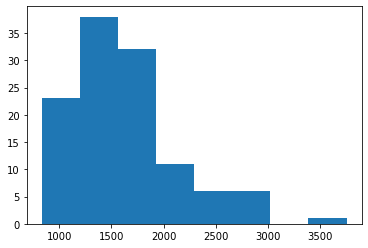

[3750]
k = 8

p:  [9.709493314458705, 17.36324062298821, 23.389203289510164, 23.734300960197228, 18.14325138484982, 10.447395195591444, 4.531144722127662, 1.4799451006681035]
interval: 261.750 

             borders  freq       rel         p
0   [837.0, 1098.75]  12.0  0.104348  0.084430
1  [1098.75, 1360.5]  28.0  0.243478  0.150985
2  [1360.5, 1622.25]  25.0  0.217391  0.203384
3  [1622.25, 1884.0]  22.0  0.191304  0.206385
4  [1884.0, 2145.75]   9.0  0.078261  0.157767
5  [2145.75, 2407.5]   8.0  0.069565  0.090847
6   [2407.5, 2931.0]  12.0  0.104348  0.052270


statistic = 18.442, p-value = 0.001


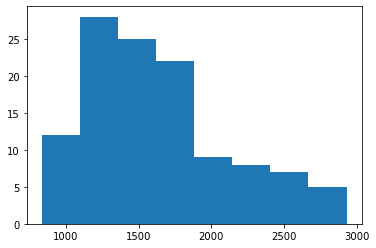

In [279]:
#4.1
d4 = df_D[["D4"]].to_numpy()
sample_task4_1 = np.asarray([x[0] for x in d4])

n = sample_task4_1.shape[0]
k = round(1 + math.log(n, 2))
print("k = %i\n" %k)

plt.hist(sample_task4_1, bins = k)
plt.show()
print(sample_task4_1[sample_task4_1 > 3000])

sample_task4_1 = sample_task4_1[sample_task4_1 <= 3000]

n = sample_task4_1.shape[0] - 1
mean = sample_task4_1.mean()
std = sample_task4_1.std()

k = round(1 + math.log(n, 2))
print("k = %i\n" %k)

result = plt.hist(sample_task4_1, bins = k)

frequency = result[0]
rel_freq = [frequency[i] / n for i in range(k)]
borders = [[result[1][i], result[1][i + 1]] for i in range(k)]
p = [sps.norm(loc = mean, scale = std).cdf(borders[i][1]) - sps.norm(loc = mean, scale = std).cdf(borders[i][0]) for i in range(k)]

print("p: ", [p[i] * n for i in range(k)])

p[-2] += p[-1]
p = p[:-1]

frequency[-2] += frequency[-1]
frequency = frequency[:-1]

rel_freq[-2] += rel_freq[-1]
rel_freq = rel_freq[:-1]

borders[-2][1] = borders[-1][1]
borders = borders[:-1]

k -= 1

print("interval: %.3f \n" %(borders[0][1] - borders[0][0]))

df_task4_1 = pd.DataFrame({"borders": borders, "freq": frequency, "rel": rel_freq, "p": p})
print(df_task4_1)
print("\n")


statistic = sum([((frequency[i] - n * p[i])**2) / (n * p[i]) for i in range(k)]) 
p_value = 1 - sps.chi2.cdf(statistic, df = k - 2 - 1)
print("statistic = %.3f, p-value = %.3f" %(statistic, p_value))

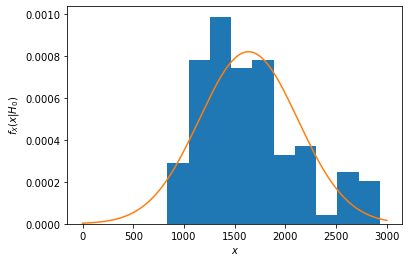

In [280]:
x = np.linspace(0, 3000, 20000)
plt.hist(sample_task4_1, bins = [borders[i][0] for i in range(k)].append(borders[k-1][1]), density = True, stacked = True)
plt.plot(x, sps.norm(loc = mean, scale = std).pdf(x))
plt.ylabel('$f_X(x|H_0)$')
plt.xlabel('$x$')
plt.show()

In [281]:
#4.2
d4 = df_D[["D4"]].to_numpy()
sample_task4_1 = np.asarray([x[0] for x in d4])

result = sps.jarque_bera(sample_task4_1)
print("statistic = %.3f, p-value = %.3f" %(result[0], result[1]))

statistic = 37.968, p-value = 0.000


<h1>Часть 5</h1>

In [282]:
#5.1
d1 = df_D[["D1"]].to_numpy()
sample_task5_1_first = np.asarray([x[0] for x in d1])

d2 = df_D[["D2"]].to_numpy()
sample_task5_1_second = np.asarray([x[0] for x in d2])

n = sample_task5_1_first.shape[0]
sign = [sample_task5_1_first[i] - sample_task5_1_second[i] for i in range(n)]
k = 0
for i in range(n):
    if sign[i] == 0:
        k += 1

print(k)

result = sign_test([sign[i] for i in range(n)])
print("statistic = %.3f, p-value = %.3f" %(result[0], result[1]))

0
statistic = -58.500, p-value = 0.000


In [283]:
#5.2
d1 = df_D[["D1"]].to_numpy()
sample_task5_2_first = np.asarray([x[0] for x in d1])

d2 = df_D[["D2"]].to_numpy()
sample_task5_2_second = np.asarray([x[0] for x in d2])

k = round(1 + math.log(n, 2))
print("k = %i\n" %k)

n = sample_task5_2_first.shape[0]

min_value = min(min(sample_task5_2_first), min(sample_task5_2_second))
interval = (max(max(sample_task5_2_first), max(sample_task5_2_second)) - min_value) / k

print("interval:", interval)

chi2_norm_value = 0
chi2_uniform_value = 0
chi2_chi2_value = 0

frequency_x = 0
frequency_y = 0
statistic = 0
bins = 0

borders = []
borders_dig = []
frequency1 = []
frequency2 = []

for i in range(k):
    a = min_value + i*interval
    b = min_value + (i + 1)*interval

    borders.append(str(a) + " - " + str(b))
    borders_dig.append(a)

    current_x = sample_task5_2_first[(sample_task5_2_first >= a) & (sample_task5_2_first < b)].size
    current_y = sample_task5_2_second[(sample_task5_2_second >= a) & (sample_task5_2_second < b)].size

    if ((current_x * n < 5) | (current_y * n < 5)):
        frequency_x += current_x
        frequency_y += current_y
    else:
        frequency_x = current_x
        frequency_y = current_y

        frequency1.append(frequency_x)
        frequency2.append(frequency_y)

        statistic += (((frequency_x/n - frequency_y/n)**2) * (1 / (frequency_x + frequency_y)))
        bins += 1

borders_dig.append(max(max(sample_task5_2_first), max(sample_task5_2_second)))

rel_freq1 = [x / n for x in frequency1]
rel_freq2 = [x / n for x in frequency2]

df_task5_2 = pd.DataFrame({"borders": borders, "freq1": frequency1, "freq2": frequency2, "rel1": rel_freq1, "rel2": rel_freq2})
print(df_task5_2)
print("\n")

statistic *= n * n
p_value = 1 - sps.chi2(df = (k - 1)).cdf(statistic)
print("statistic = %.3f, p-value = %.3f" %(statistic, p_value))


k = 8

interval: 220.875
              borders  freq1  freq2      rel1      rel2
0     540.0 - 760.875     26      8  0.222222  0.068376
1    760.875 - 981.75     37     30  0.316239  0.256410
2   981.75 - 1202.625     25     43  0.213675  0.367521
3   1202.625 - 1423.5     12     17  0.102564  0.145299
4   1423.5 - 1644.375      6      4  0.051282  0.034188
5  1644.375 - 1865.25      3      4  0.025641  0.034188
6  1865.25 - 2086.125      4      5  0.034188  0.042735
7   2086.125 - 2307.0      4      5  0.034188  0.042735


statistic = 16.653, p-value = 0.020


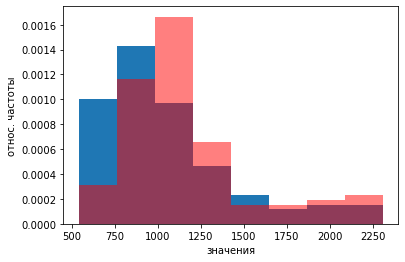

In [284]:
plt.hist(sample_task5_2_first, bins = borders_dig, density = True)
plt.hist(sample_task5_2_second, bins = borders_dig, color = "red", alpha = 0.5, density = True)
plt.ylabel('относ. частоты')
plt.xlabel('значения')
plt.show()

<h1>Часть 6</h1>

Frequency: 
 [[12. 29.]
 [10. 35.]
 [ 5. 26.]]
X borders:  [1.         1.66666667 2.33333333 3.        ]
Y borders:  [1.  1.5 2. ]


Z: 1.747
p-value: 0.418
Frequency: 
 [[ 9.46153846 31.53846154]
 [10.38461538 34.61538462]
 [ 7.15384615 23.84615385]]


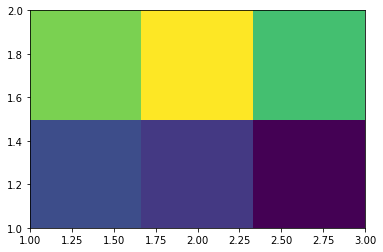

In [285]:
#6
d7 = df_D[["D7"]].to_numpy()
sample_task6_first = np.asarray([x[0] for x in d7])

d8 = df_D[["D8"]].to_numpy()
sample_task6_second = np.asarray([x[0] for x in d8])

n = sample_task6_first.shape[0]
sample_x = []
sample_y = []

for i in range(n):
    if sample_task6_first[i] == "north":
        sample_x.append(1)
    elif sample_task6_first[i] == "south":
        sample_x.append(2)
    else:
        sample_x.append(3)

    if sample_task6_second[i] == "Y":
        sample_y.append(1)
    else:
        sample_y.append(2)

result = plt.hist2d(sample_x, sample_y, bins = [3, 2])
print("Frequency: \n", result[0])
print("X borders: ", result[1])
print("Y borders: ", result[2])

print("\n")

frequency = result[0]
result2 = sps.chi2_contingency(frequency)
print("Z: %.3f" %result2[0])
print("p-value: %.3f" %result2[1])
print("Frequency: \n", result2[3])

<h1>Часть 7</h1>

In [286]:
#7
d7 = df_D[["D7"]].to_numpy()
sample_task7_first = np.asarray([x[0] for x in d7])

d9 = df_D[["D9"]].to_numpy()
sample_task7_second = np.asarray([x[0] for x in d9])

sample1 = []
sample2 = []
sample3 = []

n = sample_task7_first.shape[0]

for i in range(n):
    if sample_task6_first[i] == "north":
        sample1.append(sample_task7_second[i])
    elif sample_task6_first[i] == "south":
        sample2.append(sample_task7_second[i])
    else:
        sample3.append(sample_task7_second[i])

sample1 = np.asarray(sample1)
sample2 = np.asarray(sample2)
sample3 = np.asarray(sample3)

print("1: n = %i, mean = %.3f, var = %.3f" %(sample1.shape[0], sample1.mean(), sample1.var()))
print("2: n = %i, mean = %.3f, var = %.3f" %(sample2.shape[0], sample2.mean(), sample2.var()))
print("3: n = %i, mean = %.3f, var = %.3f" %(sample3.shape[0], sample3.mean(), sample3.var()))

n_i = [sample1.shape[0], sample2.shape[0], sample3.shape[0]]
sample_means = [sample1.mean(), sample2.mean(), sample3.mean()]
sample_vars = [sample1.var(), sample2.var(), sample3.var()]
pooled_mean = sample_task7_second.mean()
pooled_var = sample_task7_second.var()

D_b = 0
D_w = 0

for i in range(3):
    D_b += (n_i[i] * ((sample_means[i] - pooled_mean)**2))
    D_w += (n_i[i] * sample_vars[i])

D_b /= n
D_w /= n

coef_determ = D_b / pooled_var
coef_corr = coef_determ**(0.5)

statistic, p_value = sps.f_oneway(sample1, sample2, sample3)

print("\n")
print("Grouping characteristic:")
print("\tvalue: %.4f" %D_b)
print("\tfreedom degree: 2")
print("\tunbiased value: %.3f" %((n / 2) * D_b))
print("\n")

print("residual characteristic:")
print("\tvalue: %.4f" %D_w)
print("\tfreedom degree: %i" %(n - 3))
print("\tunbiased value: %.3f" %(n / (n - 3) * D_w))
print("\n")

print("all characteristic:")
print("\tvalue: %.3f" %pooled_var)
print("\tfreedom degree: %i" %(n - 1))
print("\tunbiased value: %.3f" %(n / (n - 1) * pooled_var))
print("\n")

print("coefficient of determination: %.3f" %coef_determ)
print("coefficient of correlation: %.3f" %coef_corr)
print("\n")

print("statistic: %.3f" %statistic)
print("p_value: %.3f" %p_value)

1: n = 41, mean = 6.117, var = 0.186
2: n = 45, mean = 6.178, var = 0.145
3: n = 31, mean = 6.453, var = 0.285


Grouping characteristic:
	value: 0.0187
	freedom degree: 2
	unbiased value: 1.093


residual characteristic:
	value: 0.1966
	freedom degree: 114
	unbiased value: 0.202


all characteristic:
	value: 0.215
	freedom degree: 116
	unbiased value: 0.217


coefficient of determination: 0.087
coefficient of correlation: 0.295


statistic: 5.413
p_value: 0.006


<h1>Часть 8</h1>

In [287]:
#8.1
d2 = df_D[["D2"]].to_numpy()
sample_task8_first = np.asarray([x[0] for x in d2])

d9 = df_D[["D9"]].to_numpy()
sample_task8_second = np.asarray([x[0] for x in d9])

n = sample_task8_first.shape[0]

coef_pearson = sps.pearsonr(sample_task8_first, sample_task8_second)
coef_spearman = sps.spearmanr(sample_task8_first, sample_task8_second)
coef_tau = sps.kendalltau(sample_task8_first, sample_task8_second)

print("Pearson:\n\tstatistics: %.3f\n\tp-value: %.3f" %(coef_pearson[0], coef_pearson[1]))
print("Spearman:\n\tstatistics: %.3f\n\tp-value: %.3f" %(coef_spearman[0], coef_spearman[1]))
print("Tau:\n\tstatistics: %.3f\n\tp-value: %.3f" %(coef_tau[0], coef_tau[1]))
print("\n")

buf = coef_pearson[0] + coef_pearson[0] * (1 - (coef_pearson[0]**2)) / (2 * n)

span = sps.norm(loc = 0, scale = 1).ppf(1 - (0.01 / 2)) * (1 - (coef_pearson[0]**2)) / (n**(0.5))
print("0.01: (%.3f, %.3f)" %(buf - span, buf + span))

span = sps.norm(loc = 0, scale = 1).ppf(1 - (0.05 / 2)) * (1 - (coef_pearson[0]**2)) / (n**(0.5))
print("0.5: (%.3f, %.3f)" %(buf - span, buf + span))

span = sps.norm(loc = 0, scale = 1).ppf(1 - (0.1 / 2)) * (1 - (coef_pearson[0]**2)) / (n**(0.5))
print("0.1: (%.3f, %.3f)" %(buf - span, buf + span))
print("\n")

stat_cri1 = coef_pearson[0] * ((n - 2)**(0.5)) / ((1 - (coef_pearson[0]**2))**(0.5))
print("statistic_pearson:", stat_cri1)

stat_cri2 = coef_spearman[0] * ((n - 2)**(0.5)) / ((1 - (coef_spearman[0]**2))**(0.5))
print("statistic_spearmen:", stat_cri2)

stat_cri3 = coef_tau[0] * ((9 * n*(n + 1) / (2*(2*n + 5)))**(0.5))
print("statistic_tau:", stat_cri3)

Pearson:
	statistics: 0.180
	p-value: 0.052
Spearman:
	statistics: 0.029
	p-value: 0.753
Tau:
	statistics: 0.015
	p-value: 0.814


0.01: (-0.049, 0.411)
0.5: (0.006, 0.356)
0.1: (0.034, 0.328)


statistic_pearson: 1.9664431689224378
statistic_spearmen: 0.31510948516014314
statistic_tau: 0.23783491545939875


In [288]:
#8.2
d2 = df_D[["D2"]].to_numpy()
sample_task8_2_first = np.asarray([x[0] for x in d2])

d9 = df_D[["D9"]].to_numpy()
sample_task8_2_second = np.asarray([x[0] for x in d9])

d6 = df_D[["D6"]].to_numpy()
sample_task8_2_third = np.asarray([x[0] for x in d6])

coef_tau = sps.kendalltau(sample_task8_2_first, sample_task8_2_second)
print("Tau 1-2:\n\tstatistics: %.3f\n\tp-value: %.3f" %(coef_tau[0], coef_tau[1]))

coef_tau = sps.kendalltau(sample_task8_2_first, sample_task8_2_third)
print("Tau 1-3:\n\tstatistics: %.3f\n\tp-value: %.3f" %(coef_tau[0], coef_tau[1]))

coef_tau = sps.kendalltau(sample_task8_2_second, sample_task8_2_third)
print("Tau 2-3:\n\tstatistics: %.3f\n\tp-value: %.3f" %(coef_tau[0], coef_tau[1]))

n = sample_task8_first.shape[0]

r1 = pd.Series(sample_task8_2_first).rank()
r2 = pd.Series(sample_task8_2_second).rank()
r3 = pd.Series(sample_task8_2_third).rank()

r = [r1, r2, r3]
r_mean = (sum(r1) + sum(r2) + sum(r3)) / n
k = 3 

s = 0
for i in range(n):
    buf = 0
    for j in range(k):
        buf += r[j][i] 
    s += ((buf - r_mean)**2)
    
w = (s * 12) / (n**3 - n) / ((k + 1)**2)

print('W: %.3f' % w)

z = 12 * s / (k + 1) / (n**2 - n)
f_z = sps.chi2(n - 1).cdf(z)
p_value = 1 - f_z

print("test: z = %.3f; p-value = %.3f" %(z, p_value))

Tau 1-2:
	statistics: 0.015
	p-value: 0.814
Tau 1-3:
	statistics: 0.326
	p-value: 0.000
Tau 2-3:
	statistics: 0.001
	p-value: 0.992
W: 0.236
test: z = 111.500; p-value = 0.601


<h1>Часть 9</h1>

b0 = 113.178, b1 = 152.420
DY = 5002.097, df = 1, Unbiased DY =  585245.332
DresY = 138493.175, df = 115, Unbiased DresY =  140901.752
D = 143495.272, df = 116, Unbiased D =  144732.300
Coefficient of determination = 0.035, Correlation relation =  0.187


0.01: (-1110.564, 1336.920)
0.05: (-812.274, 1038.630)
0.1: (-661.554, 887.910)


0.01: (-43.469, 348.309)
0.05: (4.280, 300.561)
0.1: (28.406, 276.434)


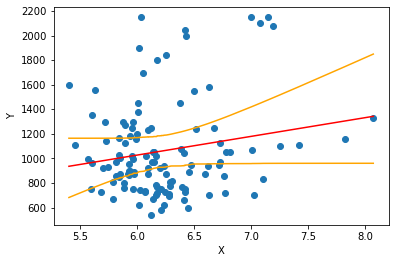

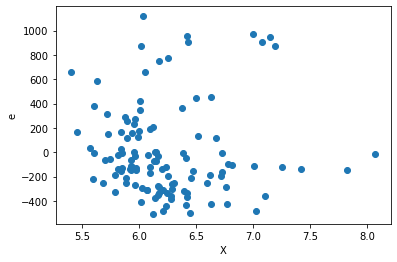

statistic = 4.154, p-value = 0.044


In [289]:
#9.1
d9 = df_D[["D9"]].to_numpy()
sample_x = np.asarray([x[0] for x in d9])

d1 = df_D[["D1"]].to_numpy()
sample_y = np.asarray([x[0] for x in d1])

n = sample_x.shape[0]
#index = []

#for i in range(n):
#    if (sample_x[i] > 7.5):
#        index.append(i)

#j = 0
#sample_x = sample_x.tolist()
#sample_y = sample_y.tolist()
#for i in range(len(index)):
#    sample_x.pop(index[i - j])
#    sample_y.pop(index[i - j])
#    j += 1

#sample_x = np.asarray(sample_x)
#sample_y = np.asarray(sample_y)

#n = sample_x.shape[0]

b1 = sps.pearsonr(sample_x, sample_y)[0] * sample_y.std() / sample_x.std()
b0 = sample_y.mean() - b1 * sample_x.mean()

print("b0 = %.3f, b1 = %.3f" %(b0, b1))

D_y = 0
D_resY = 0
D = sample_y.var()
mean = sample_y.mean()

for i in range(n):
    D_y += ((b0 + b1 * sample_x[i] - mean)**2)
    D_resY += ((b0 + b1 * sample_x[i] - sample_y[i])**2)

D_y /= n 
D_resY /= n

print("DY = %.3f, df = %i, Unbiased DY =  %.3f" %(D_y, 1, n / 1 * D_y))
print("DresY = %.3f, df = %i, Unbiased DresY =  %.3f" %(D_resY, n - 2, n / (n - 2) * D_resY))
print("D = %.3f, df = %i, Unbiased D =  %.3f" %(D, n - 1, n / (n - 1) * D))

R2 = D_y / D
R = R2**(0.5)

print("Coefficient of determination = %.3f, Correlation relation =  %.3f" %(R2, R))
print("\n")

span = sps.t(n - 2).ppf(1 - (0.01 / 2)) * ((n / (n - 2) * D_resY * sum([x*x for x in sample_x]) / (n*n) / sample_x.var())**(0.5))
print("0.01: (%.3f, %.3f)" %(b0 - span, b0 + span))

span = sps.t(n - 2).ppf(1 - (0.05 / 2)) * ((n / (n - 2) * D_resY * sum([x*x for x in sample_x]) / (n*n) / sample_x.var())**(0.5))
print("0.05: (%.3f, %.3f)" %(b0 - span, b0 + span))

span = sps.t(n - 2).ppf(1 - (0.1 / 2)) * ((n / (n - 2) * D_resY * sum([x*x for x in sample_x]) / (n*n) / sample_x.var())**(0.5))
print("0.1: (%.3f, %.3f)" %(b0 - span, b0 + span))
print("\n")

span = sps.t(n - 2).ppf(1 - (0.01 / 2)) * ((n / (n - 2) * D_resY * 1 / n / sample_x.var())**(0.5))
print("0.01: (%.3f, %.3f)" %(b1 - span, b1 + span))

span = sps.t(n - 2).ppf(1 - (0.05 / 2)) * ((n / (n - 2) * D_resY * 1 / n / sample_x.var())**(0.5))
print("0.05: (%.3f, %.3f)" %(b1 - span, b1 + span))

span = sps.t(n - 2).ppf(1 - (0.1 / 2)) * ((n / (n - 2) * D_resY * 1 / n / sample_x.var())**(0.5))
print("0.1: (%.3f, %.3f)" %(b1 - span, b1 + span))

f_x = [b0 + b1 * x for x in sample_x]
f_x_top = [f_x[i] + sps.t(n - 2).ppf(1 - (0.1 / 2)) * ((n / (n - 2) * D_resY * (1 / n + ((sample_x[i] - sample_x.mean())**2 / n / sample_x.var()))  / sample_x.var())**(0.5)) for i in range(n)]
f_x_bottom = [f_x[i] - sps.t(n - 2).ppf(1 - (0.1 / 2)) * ((n / (n - 2) * D_resY * (1 / n + ((sample_x[i] - sample_x.mean())**2 / n / sample_x.var()))  / sample_x.var())**(0.5)) for i in range(n)]

f = np.asarray([[sample_x[i], f_x[i], f_x_top[i], f_x_bottom[i]] for i in range(n)])
f = np.sort(f, 0)
x = [x[0] for x in f]
y = [x[1] for x in f]
y_top = [x[2] for x in f]
y_bottom = [x[3] for x in f]

plt.scatter(sample_x, sample_y)
plt.plot(x, y, color = "red")
plt.plot(x, y_top, color = "orange")
plt.plot(x, y_bottom, color = "orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

err = [sample_y[i] - f_x[i] for i in range(n)]
plt.scatter(sample_x, err)
plt.xlabel("X")
plt.ylabel("e")
plt.show()

statistic = D_y / (D_resY / (n - 2))
p_value = 1 - sps.f.cdf(statistic, dfn = 1, dfd = (n - 2))
print("statistic = %.3f, p-value = %.3f" %(statistic, p_value))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     3.002
Date:                Fri, 29 Dec 2023   Prob (F-statistic):             0.0536
Time:                        00:59:02   Log-Likelihood:                -857.65
No. Observations:                 117   AIC:                             1721.
Df Residuals:                     114   BIC:                             1730.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1           5818.8649   4253.213      1.368      0.1

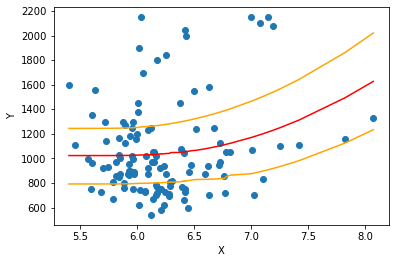

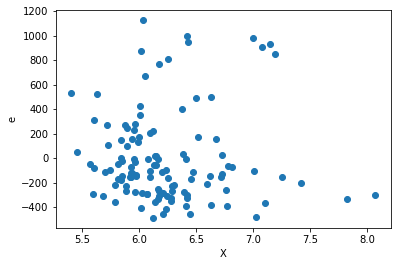

statistic = 3.002, p-value = 0.054


In [290]:
#9.2
d9 = df_D[["D9"]].to_numpy()
sample_x2 = np.asarray([x[0] for x in d9])

d1 = df_D[["D1"]].to_numpy()
sample_y = np.asarray([x[0] for x in d1])

n = sample_x.shape[0]

sample_x1 = np.asarray([1] * n)
sample_x3 = np.asarray([x*x for x in sample_x2])

X = pd.DataFrame({"1": sample_x1, "x": sample_x2, "x^2": sample_x3})
X = sm.add_constant(X, prepend=False)

model = OLS(sample_y, X)
res = model.fit()
print(res.summary())
X = np.asarray([sample_x1, sample_x2, sample_x3])
f_x = [5818.8649 - 1610.4660 * x + 135.212 * x * x for x in sample_x2]

D_y = 0
D_resY = 0
D = sample_y.var()
mean = sample_y.mean()

for i in range(n):
    D_y += ((f_x[i] - mean)**2)
    D_resY += ((f_x[i] - sample_y[i])**2)

D_y /= n 
D_resY /= n

R2 = D_y / D
R = R2**(0.5)

print("Coefficient of determination = %.3f, Correlation relation =  %.3f" %(R2, R))
print("\n")

f_x_top = [f_x[i] + sps.t(n - 3).ppf(1 - (0.1 / 2)) * ((n / (n - 2) * D_resY * (1 / n + sum([(X[j][i] - X.mean()) ** 2 / (n * X.var()) for j in range(3) ]))  / sample_x.var())**(0.5)) for i in range(n)]
f_x_bottom = [f_x[i] - sps.t(n - 3).ppf(1 - (0.1 / 2)) * ((n / (n - 2) * D_resY * (1 / n + sum([(X[j][i] - X.mean()) ** 2 / (n * X.var()) for j in range(3) ]))  / sample_x.var())**(0.5)) for i in range(n)]

f = np.asarray([[sample_x2[i], f_x[i], f_x_top[i], f_x_bottom[i]] for i in range(n)])
f = np.sort(f, 0)
x = [x[0] for x in f]
y = [x[1] for x in f]
y_top = [x[2] for x in f]
y_bottom = [x[3] for x in f]

plt.scatter(sample_x, sample_y)
plt.plot(x, y, color = "red")
plt.plot(x, y_top, color = "orange")
plt.plot(x, y_bottom, color = "orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

err = [sample_y[i] - f_x[i] for i in range(n)]
plt.scatter(sample_x, err)
plt.xlabel("X")
plt.ylabel("e")
plt.show()

statistic = (D_y / 2) / (D_resY / (n - 3))
p_value = 1 - sps.f.cdf(statistic, dfn = 2, dfd = (n - 3))
print("statistic = %.3f, p-value = %.3f" %(statistic, p_value))

In [291]:
print("DY = %.3f, df = %i, Unbiased DY =  %.3f" %(D_y, 2, n / 1 * D_y))
print("DresY = %.3f, df = %i, Unbiased DresY =  %.3f" %(D_resY, n - 3, n / (n - 3) * D_resY))
print("D = %.3f, df = %i, Unbiased D =  %.3f" %(D, n - 1, n / (n - 1) * D))

R2 = D_y / D
R = R2**(0.5)

print("Coefficient of determination = %.3f, Correlation relation =  %.3f" %(R2, R))
print("\n")

DY = 7180.065, df = 2, Unbiased DY =  840067.564
DresY = 136315.185, df = 114, Unbiased DresY =  139902.427
D = 143495.272, df = 116, Unbiased D =  144732.300
Coefficient of determination = 0.050, Correlation relation =  0.224




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     3.115
Date:                Fri, 29 Dec 2023   Prob (F-statistic):             0.0482
Time:                        00:59:03   Log-Likelihood:                -857.54
No. Observations:                 117   AIC:                             1721.
Df Residuals:                     114   BIC:                             1729.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             -8.5389    472.865     -0.018      0.9

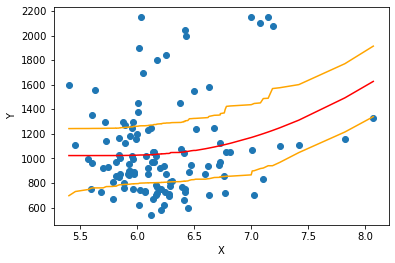

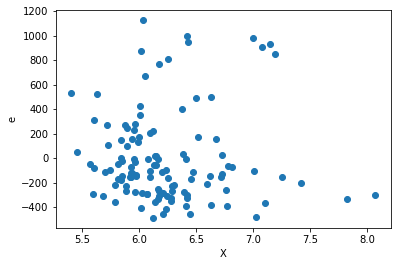

statistic = 3.002, p-value = 0.054


In [292]:
#9.3
d9 = df_D[["D9"]].to_numpy()
sample_x2 = np.asarray([x[0] for x in d9])

d10 = df_D[["D10"]].to_numpy()
sample_x3 = np.asarray([x[0] for x in d10])

d1 = df_D[["D1"]].to_numpy()
sample_y = np.asarray([x[0] for x in d1])

n = sample_x.shape[0]

sample_x1 = np.asarray([1] * n)

X = pd.DataFrame({"1": sample_x1, "x1": sample_x2, "x2": sample_x3})
X = sm.add_constant(X, prepend=False)

model = OLS(sample_y, X)
res = model.fit()
print(res.summary())
X = np.asarray([sample_x1, sample_x2, sample_x3])
f_x = [5818.8649 - 1610.4660 * x + 135.212 * x * x for x in sample_x2]

D_y = 0
D_resY = 0
D = sample_y.var()
mean = sample_y.mean()

for i in range(n):
    D_y += ((f_x[i] - mean)**2)
    D_resY += ((f_x[i] - sample_y[i])**2)

D_y /= n 
D_resY /= n

R2 = D_y / D
R = R2**(0.5)

print("Coefficient of determination = %.3f, Correlation relation =  %.3f" %(R2, R))
print("\n")

f_x_top = [f_x[i] + sps.t(n - 3).ppf(1 - (0.1 / 2)) * ((n / (n - 2) * D_resY * (1 / n + sum([(X[j][i] - X.mean()) ** 2 / (n * X.var()) for j in range(3) ]))  / sample_x.var())**(0.5)) for i in range(n)]
f_x_bottom = [f_x[i] - sps.t(n - 3).ppf(1 - (0.1 / 2)) * ((n / (n - 2) * D_resY * (1 / n + sum([(X[j][i] - X.mean()) ** 2 / (n * X.var()) for j in range(3) ]))  / sample_x.var())**(0.5)) for i in range(n)]

f = np.asarray([[sample_x2[i], f_x[i], f_x_top[i], f_x_bottom[i]] for i in range(n)])
f = np.sort(f, 0)
x = [x[0] for x in f]
y = [x[1] for x in f]
y_top = [x[2] for x in f]
y_bottom = [x[3] for x in f]

plt.scatter(sample_x, sample_y)
plt.plot(x, y, color = "red")
plt.plot(x, y_top, color = "orange")
plt.plot(x, y_bottom, color = "orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

err = [sample_y[i] - f_x[i] for i in range(n)]
plt.scatter(sample_x, err)
plt.xlabel("X")
plt.ylabel("e")
plt.show()

statistic = (D_y / 2) / (D_resY / (n - 3))
p_value = 1 - sps.f.cdf(statistic, dfn = 2, dfd = (n - 3))
print("statistic = %.3f, p-value = %.3f" %(statistic, p_value))

In [293]:
print("DY = %.3f, df = %i, Unbiased DY =  %.3f" %(D_y, 2, n / 1 * D_y))
print("DresY = %.3f, df = %i, Unbiased DresY =  %.3f" %(D_resY, n - 3, n / (n - 3) * D_resY))
print("D = %.3f, df = %i, Unbiased D =  %.3f" %(D, n - 1, n / (n - 1) * D))

R2 = D_y / D
R = R2**(0.5)

print("Coefficient of determination = %.3f, Correlation relation =  %.3f" %(R2, R))
print("\n")

DY = 7180.065, df = 2, Unbiased DY =  840067.564
DresY = 136315.185, df = 114, Unbiased DresY =  139902.427
D = 143495.272, df = 116, Unbiased D =  144732.300
Coefficient of determination = 0.050, Correlation relation =  0.224


